In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to visualize data
import seaborn as sns

In [2]:
df= pd.read_csv('Twitter_Sentiment_Analysis.csv',encoding='latin-1') # extracting data using pandas

In [3]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
# naming the columns
df.columns = ['Sentiment', 'Id', 'Date', 'Query', 'User_Id', 'Text']
df.head()

,Sentiment,Id,Date,Query,User_Id,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df.info() # this gives the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1599999 non-null  int64 
 1   Id         1599999 non-null  int64 
 2   Date       1599999 non-null  object
 3   Query      1599999 non-null  object
 4   User_Id    1599999 non-null  object
 5   Text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

C:\Users\shamb\AppData\Local\Temp\ipykernel_21628\2345423161.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Sentiment  1599999 non-null  int64         
 1   Id         1599999 non-null  int64         
 2   Date       1599999 non-null  datetime64[ns]
 3   Query      1599999 non-null  object        
 4   User_Id    1599999 non-null  object        
 5   Text       1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


The dataset has 1599999 entries with total 6 columns. In the 6 columns, 3 are objects, 2 are numericals and 1 date-time data types.

In [7]:
df.describe()

,Sentiment,Id,Date
count,1.599999e+06,1.599999e+06,1599999
mean,2.000001e+00,1.998818e+09,2009-05-31 07:26:27.994492416
min,0.000000e+00,1.467811e+09,2009-04-06 22:19:49
25%,0.000000e+00,1.956916e+09,2009-05-28 23:01:17.500000
50%,4.000000e+00,2.002102e+09,2009-06-02 03:08:55
75%,4.000000e+00,2.177059e+09,2009-06-15 05:21:43.500000
max,4.000000e+00,2.329206e+09,2009-06-25 10:28:31
std,2.000001e+00,1.935757e+08,NaN


In [8]:
pd.isnull(df).sum() # check for null values

Sentiment    0
Id           0
Date         0
Query        0
User_Id      0
Text         0
dtype: int64

we can see that there are no null values.

In [9]:
df.duplicated().sum()  # check for duplicates.

0

There are no duplicates in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Sentiment  1599999 non-null  int64         
 1   Id         1599999 non-null  int64         
 2   Date       1599999 non-null  datetime64[ns]
 3   Query      1599999 non-null  object        
 4   User_Id    1599999 non-null  object        
 5   Text       1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


In [11]:
df.columns

Index(['Sentiment', 'Id', 'Date', 'Query', 'User_Id', 'Text'], dtype='object')

Exploratory Data Analysis

In [12]:
df['Sentiment'].unique()

array([0, 4], dtype=int64)

In [13]:
df['Sentiment'] = df['Sentiment'].map({0: 'Negative', 4: 'Positive'})
print(df)

        Sentiment          Id                Date     Query          User_Id  \
0        Negative  1467810672 2009-04-06 22:19:49  NO_QUERY    scotthamilton   
1        Negative  1467810917 2009-04-06 22:19:53  NO_QUERY         mattycus   
2        Negative  1467811184 2009-04-06 22:19:57  NO_QUERY          ElleCTF   
3        Negative  1467811193 2009-04-06 22:19:57  NO_QUERY           Karoli   
4        Negative  1467811372 2009-04-06 22:20:00  NO_QUERY         joy_wolf   
...           ...         ...                 ...       ...              ...   
1599994  Positive  2193601966 2009-06-16 08:40:49  NO_QUERY  AmandaMarie1028   
1599995  Positive  2193601969 2009-06-16 08:40:49  NO_QUERY      TheWDBoards   
1599996  Positive  2193601991 2009-06-16 08:40:49  NO_QUERY           bpbabe   
1599997  Positive  2193602064 2009-06-16 08:40:49  NO_QUERY     tinydiamondz   
1599998  Positive  2193602129 2009-06-16 08:40:50  NO_QUERY   RyanTrevMorris   

                                       

<Axes: xlabel='Sentiment', ylabel='count'>

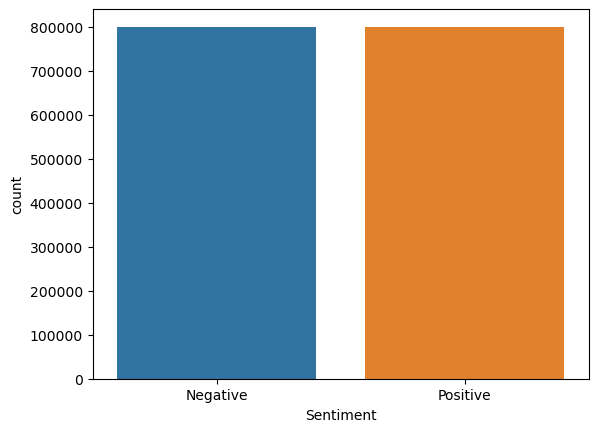

In [14]:
sns.countplot(x='Sentiment',data=df)

In [15]:
df['Sentiment'].value_counts()

Sentiment
Positive    800000
Negative    799999
Name: count, dtype: int64

Positive and negative Sentiment is almost equal.

<Axes: >

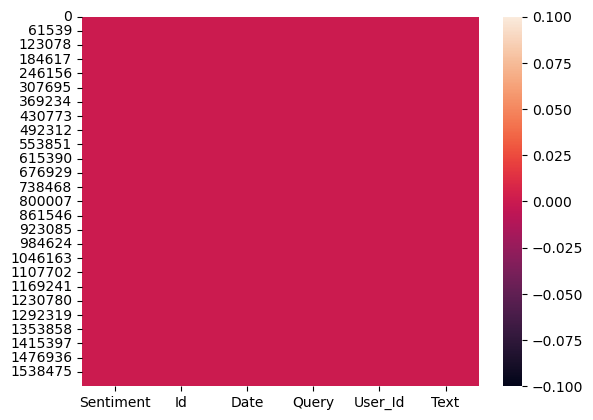

In [16]:
sns.heatmap(df.isnull())

In [17]:
from nltk.corpus import stopwords 
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shamb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import re        
from nltk.stem.porter import PorterStemmer


In [ ]:
port_stem=PorterStemmer()

In [ ]:
#removing special characters from the text

def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    
    
    return stemmed_content

In [ ]:
df['stemmed_content']=df['Text'].apply(stemming)

In [ ]:
df.head()

In [ ]:
print(df['stemmed_content'])

In [ ]:
print(df['Sentiment'])

Split the dataset into Training and Test set

In [ ]:
x=df['stemmed_content'].values
y=df['Sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train)

In [ ]:
print(y_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Converting text into numericals

In [ ]:
vectorizer=TfidfVectorizer()

x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

Predicting the Test set results

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

Accuracy of the Model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_pred,y_test)

In [ ]:
score